In [1]:
%matplotlib widget
from CG import *

In [2]:
A = np.matrix([[3.0, 2.0], [2.0, 6.0]])
b = np.matrix([[2.0], [-8.0]])
c = 0.0

## 8. The Method of Conjugate Gradients <a id="8"></a>

It may seem odd that an article about CG doesn’t describe CG until section 8, but all the machinery is now in place. In fact, CG is simply the method of Conjugate Directions where the search directions are constructed by conjugation of the residuals (that is, by setting $\mu_i = r_{[i]}$).

This choice makes sense for many reasons. First, the residuals worked for Steepest Descent, so why not for Conjugate Directions? Second, the residual has the nice property that it’s orthogonal to the previous search directions (Equation 39), so it’s guaranteed always to produce a new, linearly independent search direction unless the residual is zero, in which case the problem is already solved. As we shall see, there is an even better reason to choose the residual.

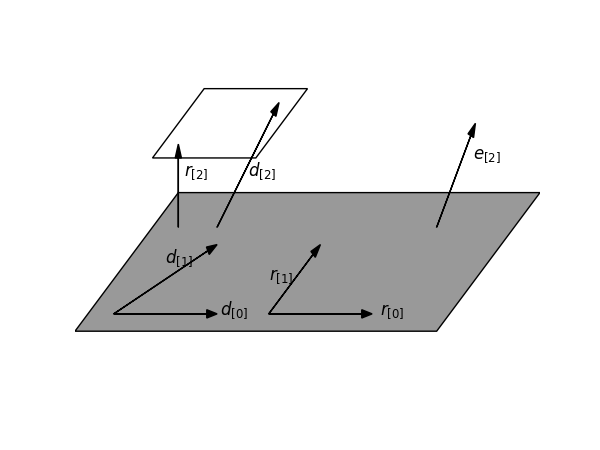

In [3]:
fig29()

<center>Figure 29: In the method of Conjugate Gradients, each new residual is orthogonal to all the previous residuals and search directions; and each new search direction is constructed (from the residual) to be $A$-orthogonal to all the previous residuals and search directions. The endpoints of $r_{[2]}$ and $d_{[2]}$ lie on a plane parellel to $\mathcal{D}_2$ (the shaded subspace). In CG, $d_{[2]}$ is a linear combination of $r_{[2]}$ and $d_{[1]}$</center>

Let’s consider the implications of this choice. Because the search vectors are built from the residuals, the subspace span{$r_{[0]}, r_{[1]}, \dots, r_{[i-1]}$} is equal to $\mathcal{D}_i$. As each residual is orthogonal to the previous search directions, it is also orthogonal to the previous residuals (see Figure 29); Equation 41 becomes

\begin{equation}
r^T_{[i]}r_{[j]} = 0, \quad i\neq j \tag{44}
\end{equation}

Interestingly, Equation 43 shows that each new residual $r_{[i]}$ is just a linear combination of the previous residual and $Ad_{[i-1]}$. Recalling that $d_{[i-1]} \in \mathcal{D}_i$, this fact implies that each new subspace $\mathcal{D}_{i+1}$ is formed from the union of the previous subspace $\mathcal{D}_i$ and the subspace $A\mathcal{D}_i$. Hence,

\begin{align*}
\mathcal{D}_i &= \text{span\{}d_{[0]}, Ad_{[0]}, A^2d_{[0]}, \dots, A^{i-1}d_{[0]}\}\\
&= \text{span\{}r_{[0]}, Ar_{[0]}, A^2r_{[0]}, \dots, A^{i-1}r_{[0]}\}.\\
\end{align*}

This subspace is called a *Krylov subspace*, a subspace created by repeatedly applying a matrix to a vector. It has a pleasing property: because $A\mathcal{D}_i$ is included in $\mathcal{D}_{i+1}$, the fact that the next residual $r_{[i+1]}$ is orthogonal to $\mathcal{D}_{i+1}$ (Equation 39) implies that $r_{[i+1]}$ is $A$-orthogonal to $\mathcal{D}_i$. Gram-Schmidt conjugation becomes easy, because $r_{[i+1]}$ is already $A$-orthogonal to all of the previous search directions except $d_{[i]}$!

Recall from Equation 37 that the Gram-Schmidt constants are $\beta_{ij} = -r^T_{[i]}Ad_{[j]}/d^T_{[j]}Ad_{[j]}$; let us simplify this expression. Taking the inner product of $r_{[i]}$ and Equation 43,

\begin{align*}
r^T_{[i]}r_{[j+1]} &= r^T_{[i]}r_{[j]} - \alpha_{[j]} r^T_{[i]} A d_{[j]} \\
\alpha_{[j]} r^T_{[i]} A d_{[j]} &= r^T_{[i]}r_{[j]} - r^T_{[i]}r_{[j+1]} \\
r^T_{[i]}Ad_{[j]} &=
    \begin{cases}
    \frac{1}{\alpha_{[i]}}r^T_{[i]}r_{[i]}, & i=j,\\
    -\frac{1}{\alpha_{[i-1]}}r^T_{[i]}r_{[i]}, & i=j+1, & \text{(by Equation 44)}\\
    0, & \text{otherwise.}
    \end{cases} \\  
\therefore \beta_{ij} &=
    \begin{cases}
    \frac{1}{\alpha_{[i-1]}}\frac{r^T_{[i]}r_{[i]}}{d^T_{[i-1]}Ad_{[i-1]}}, & i = j+1\\
    0, & i > j+1.
    \end{cases} \quad \text{(by Equation 37)}
\end{align*}

As if by magic, most of the terms have disappeared. It is no longer necessary to store old search vectors to ensure the $A$-orthogonality of new search vectors. This major advance is what makes CG as important an algorithm as it is, because both the space complexity and time complexity per iteration are reduced from
$\mathcal{O}(n^2)$ to $\mathcal{O}(m)$, where $m$ is the number of nonzero entries of $A$. Henceforth, I shall use the abbreviation $\beta_{[i]} = \beta_{i,i-1}$. Simplifying further:

\begin{align*}
\beta_{[i]} &= \frac{r^T_{[i]}r_{[i]}}{d^T_{[i-1]}r_{[i-1]}} & \text{(by Equation 32)}\\
&= \frac{r^T_{[i]}r_{[i]}}{r^T_{[i-1]}r_{[i-1]}} & \text{(by Equation 42).}
\end{align*}

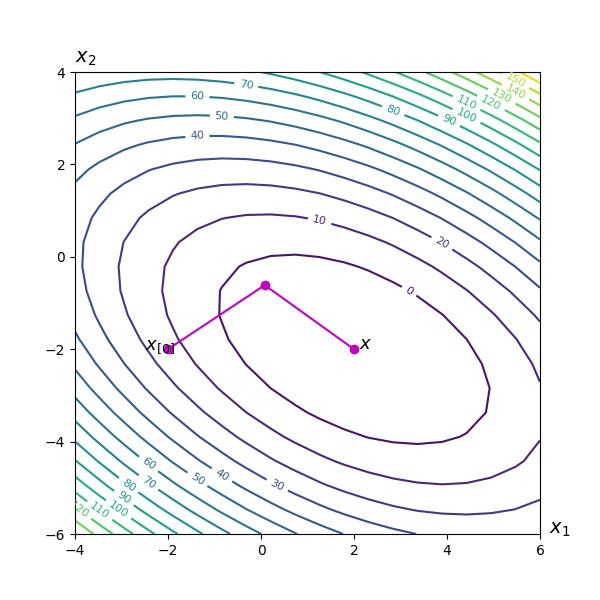

In [4]:
fig30(A, b, c)

<center>Figure 30: The method of Conjugate Gradients.</center>

Let’s put it all together into one piece now. The method of Conjugate Gradients is:

\begin{align*}
d_{[0]} &= r_{[0]} = b - Ax_{[0]} \tag{45} \\
\alpha_{[i]} &= \frac{r^T_{[i]}r_{[i]}}{d^T_{[i]}Ad_{[i]}} \qquad \text{(by Equations 32 and 42),} \tag{46} \\
x_{[i+1]} &= x_{[i]} + \alpha_{[i]}d_{[i]}, \\
r_{[i+1]} &= r_{[i]} - \alpha_{[i]}Ad_{[i]}, \tag{46} \\
\beta_{[i+1]} &= \frac{r^T_{[i+1]}r_{[i+1]}}{r^T_{[i]}r_{[i]}}, \tag{48}\\
d_{[i+1]} &= r_{[i+1]} + \beta_{[i+1]}d_{[i]}. \tag{49}
\end{align*}

The performance of CG on our sample problem is demonstrated in Figure 30. The name “Conjugate Gradients” is a bit of a misnomer, because the gradients are not conjugate, and the conjugate directions are not all gradients. “Conjugated Gradients” would be more accurate.

<html>
<hr style="height:2px;border:none;color:#228;background-color:#228;" />
<span style="color:#228">

<p>Below I have added another interactive figure for you to explore the method of Conjugate Gradients. You can change the system and the starting point.
</span>

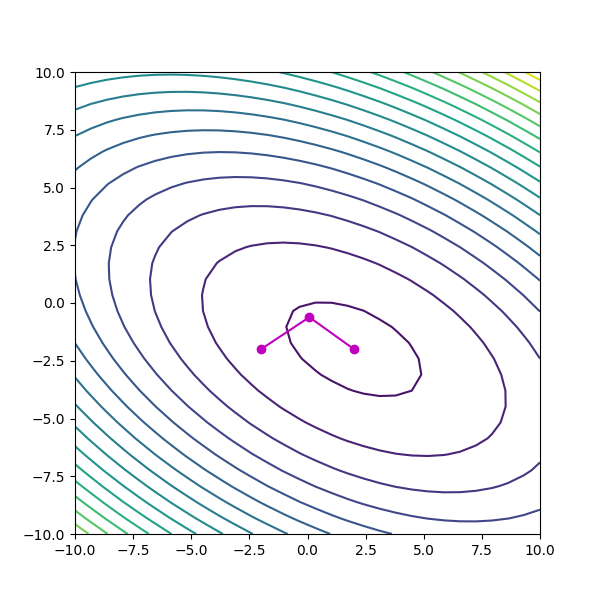

In [5]:
axC = fig_C()

In [6]:
sliders_figC(axC)

Box(children=(Box(children=(Box(children=(FloatSlider(value=3.0, max=10.0, min=-10.0), FloatSlider(value=2.0, …

<html>
<hr style="height:2px;border:none;color:#228;background-color:#228;" />
</html>

Next: [9. Convergence Analysis of Conjugate Gradients](CG09.ipynb)